# Etapas na construção de um sistema vencedor

Geração de ideias e regras de investimento -> Coleta e armazenamento de dados -> Teste histórico dos dados a partir das regras adotadas -> Análise de métricas e resultados do modelo -> Otmização das regras -> Implementação local do modelo na prática a partir de dados em tempo real -> Implementação na nuvem.

O processo que nós vamos focar hoje é o BACKTEST.  

# Projeto: Modelo de Bitcoin para surfar tendências de alta e sair antes das baixas.


### Passo a passo:

   **Passo 1** - Importar bibliotecas
   
   **Passo 2** - Pegar dados de cotação do Yahoo Finance
   
   **Passo 3** - Calcular indicadores pro modelo
   
   **Passo 4** - Gerar sinais de compra
   
   **Passo 5** - Visualizar gráfico de máximas históricas
   
   **Passo 6** - Gerar sinais de venda
   
   **Passo 7** - Criar um ID para todos os trades históricos na tabela
   
   **Passo 8** - Calcular retornos de todos os trades

   **Passo 9** - Gráfico de retornos

   **Passo 10** - Otimizar o parâmetro 
   
-------------------

# Passo 1 - Importar as bibliotecas

In [7]:
!pip install yfinance

In [8]:
!pip install mplcyberpunk

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")

# Passo 2 - Pegar dados de cotação do Yahoo Finance

In [11]:
ticker = "BTC-USD"

In [12]:
dados = yf.download(ticker, start = "2000-01-01", end = "2024-11-30")

dados

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-11-25,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490
2024-11-26,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855


In [13]:
dados = dados.droplevel(1, axis = 1)

dados

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-11-25,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490
2024-11-26,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855
2024-11-27,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438


# Passo 3 - Calcular indicadores pro modelo

In [15]:
dados["retorno"] = dados["Adj Close"].pct_change()

dados

Price,Adj Close,Close,High,Low,Open,Volume,retorno
Date,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,-0.071926
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,-0.069843
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,0.035735
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,-0.024659
...,...,...,...,...,...,...,...
2024-11-25,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490,-0.050111
2024-11-26,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855,-0.011997
2024-11-27,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438,0.043237


In [22]:
dados_retornos_completos = dados["retorno"]

In [23]:
dados["media_maxima"] = dados["High"].rolling(window = 20).mean()
dados["media_minima"] = dados["Low"].rolling(window = 20).mean()

dados

Price,Adj Close,Close,High,Low,Open,Volume,retorno,media_maxima,media_minima
Date,,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,NaN
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,-0.071926,NaN,NaN
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,-0.069843,NaN,NaN
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,0.035735,NaN,NaN
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,-0.024659,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-11-25,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490,-0.050111,90282.908984,86229.426562
2024-11-26,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855,-0.011997,91209.488672,87301.865625
2024-11-27,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438,0.043237,92230.391797,88166.777734


# Passo 4 - Gerar sinais de compra

In [25]:
dados["sinal_compra"] = 0
dados["sinal_compra"] = (dados["Close"] > dados["media_maxima"]).astype(int)

dados

Price,Adj Close,Close,High,Low,Open,Volume,retorno,media_maxima,media_minima,sinal_compra
Date,,,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,NaN,0
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,-0.071926,NaN,NaN,0
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,-0.069843,NaN,NaN,0
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,0.035735,NaN,NaN,0
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,-0.024659,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2024-11-25,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490,-0.050111,90282.908984,86229.426562,1
2024-11-26,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855,-0.011997,91209.488672,87301.865625,1
2024-11-27,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438,0.043237,92230.391797,88166.777734,1


# Passo 5 - Gerar sinais de venda

In [27]:
dados["sinal_venda"] = 0
dados["sinal_venda"] = (dados["Close"] < dados["media_minima"]).astype(int)

dados

Price,Adj Close,Close,High,Low,Open,Volume,retorno,media_maxima,media_minima,sinal_compra,sinal_venda
Date,,,,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,NaN,0,0
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,-0.071926,NaN,NaN,0,0
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,-0.069843,NaN,NaN,0,0
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,0.035735,NaN,NaN,0,0
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,-0.024659,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490,-0.050111,90282.908984,86229.426562,1,0
2024-11-26,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855,-0.011997,91209.488672,87301.865625,1,0
2024-11-27,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438,0.043237,92230.391797,88166.777734,1,0


In [30]:
len(dados)

3727

# Passo 6 - Gerar operações

In [33]:
dados["posicao"] = 0

for i in range(1, len(dados)):

    if dados["sinal_compra"].iloc[i] == 1:

        dados["posicao"].iloc[i] = 1

    elif dados["sinal_venda"].iloc[i] == 1:

        dados["posicao"].iloc[i] = 0

    else:

        if (dados["posicao"].iloc[i - 1] == 1) and (dados["sinal_venda"].iloc[i] == 0):

            dados["posicao"].iloc[i] = 1

        else:

            dados["posicao"].iloc[i] = 0

        
dados    

C:\Users\carlo\AppData\Local\Temp\ipykernel_9500\3786475345.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dados["posicao"].iloc[i] = 0
C:\Users\carlo\AppData\Local\Temp\ipykernel_9500\3786475345.py:21: SettingWithCopyWarning: 
A value

In [34]:
dados["posicao"] = dados["posicao"].shift()

dados

Price,Adj Close,Close,High,Low,Open,Volume,retorno,media_maxima,media_minima,sinal_compra,sinal_venda,posicao
Date,,,,,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,NaN,0,0,NaN
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,-0.071926,NaN,NaN,0,0,0.0
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,-0.069843,NaN,NaN,0,0,0.0
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,0.035735,NaN,NaN,0,0,0.0
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,-0.024659,NaN,NaN,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490,-0.050111,90282.908984,86229.426562,1,0,1.0
2024-11-26,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855,-0.011997,91209.488672,87301.865625,1,0,1.0
2024-11-27,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438,0.043237,92230.391797,88166.777734,1,0,1.0


# Passo 7 - Criar um ID para todos os trades históricos na tabela

In [36]:
dados["trades"] = (dados["posicao"] != dados["posicao"].shift()).cumsum()

dados.head(50)

Price,Adj Close,Close,High,Low,Open,Volume,retorno,media_maxima,media_minima,sinal_compra,sinal_venda,posicao,trades
Date,,,,,,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,NaN,0,0,NaN,1
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,-0.071926,NaN,NaN,0,0,0.0,2
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,-0.069843,NaN,NaN,0,0,0.0,2
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,0.035735,NaN,NaN,0,0,0.0,2
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,-0.024659,NaN,NaN,0,0,0.0,2
2014-09-22,402.152008,402.152008,406.915985,397.130005,399.100006,24127600,0.008352,NaN,NaN,0,0,0.0,2
2014-09-23,435.790985,435.790985,441.557007,396.196991,402.092010,45099500,0.083647,NaN,NaN,0,0,0.0,2
2014-09-24,423.204987,423.204987,436.112000,421.131989,435.751007,30627700,-0.028881,NaN,NaN,0,0,0.0,2
2014-09-25,411.574005,411.574005,423.519989,409.467987,423.156006,26814400,-0.027483,NaN,NaN,0,0,0.0,2


In [38]:
dados["trades"] = dados["trades"].where(dados["posicao"] == 1)

dados

Price,Adj Close,Close,High,Low,Open,Volume,retorno,media_maxima,media_minima,sinal_compra,sinal_venda,posicao,trades
Date,,,,,,,,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,NaN,NaN,NaN,0,0,NaN,NaN
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,-0.071926,NaN,NaN,0,0,0.0,NaN
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,-0.069843,NaN,NaN,0,0,0.0,NaN
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,0.035735,NaN,NaN,0,0,0.0,NaN
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,-0.024659,NaN,NaN,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490,-0.050111,90282.908984,86229.426562,1,0,1.0,173.0
2024-11-26,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855,-0.011997,91209.488672,87301.865625,1,0,1.0,173.0
2024-11-27,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438,0.043237,92230.391797,88166.777734,1,0,1.0,173.0


In [40]:
dados = dados.dropna(subset = "trades")

dados

Price,Adj Close,Close,High,Low,Open,Volume,retorno,media_maxima,media_minima,sinal_compra,sinal_venda,posicao,trades
Date,,,,,,,,,,,,,
2014-10-14,400.869995,400.869995,411.697998,391.324005,391.691986,38491500,0.026782,381.761551,358.841350,1,0,1.0,3.0
2014-10-15,394.773010,394.773010,402.226990,388.765991,400.954987,25267100,-0.015209,380.696901,357.806250,1,0,1.0,3.0
2014-10-16,382.556000,382.556000,398.807007,373.070007,394.518005,26990000,-0.030947,379.890352,356.459300,1,0,1.0,3.0
2014-10-17,383.757996,383.757996,385.477997,375.389008,382.756012,13600700,0.003142,378.833102,355.360150,1,0,1.0,3.0
2014-10-18,391.441986,391.441986,395.157990,378.971008,383.976013,11416800,0.020023,378.540152,355.592101,1,0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25,93102.296875,93102.296875,98935.031250,92642.914062,98033.445312,80909462490,-0.050111,90282.908984,86229.426562,1,0,1.0,173.0
2024-11-26,91985.320312,91985.320312,94991.750000,90770.812500,93087.281250,91656519855,-0.011997,91209.488672,87301.865625,1,0,1.0,173.0
2024-11-27,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438,0.043237,92230.391797,88166.777734,1,0,1.0,173.0


# Passo 8 - Calcular retornos de todos os trades

In [42]:
df_retorno_acumulado = (1 + dados["retorno"]).cumprod() - 1
dados_retornos_completos_acum = (1 + dados_retornos_completos).cumprod() - 1

print(df_retorno_acumulado.iloc[-1], dados_retornos_completos_acum.iloc[-1])

365.41734810010274 212.10796980712803


# Passo 9 - Gráfico de retornos

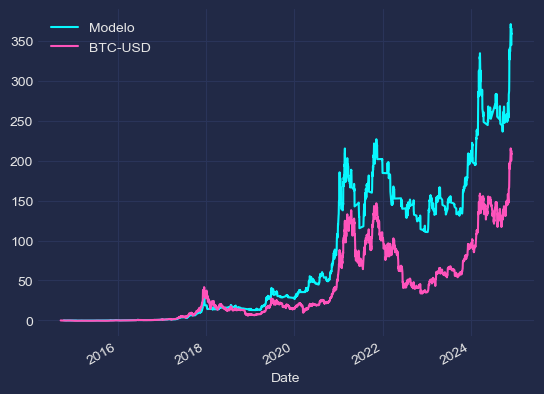

In [44]:
df_retorno_acumulado.plot(label = "Modelo")
dados_retornos_completos_acum.plot(label = ticker)
plt.legend()

plt.show()

# Passo 10 -  Otimizar o parâmetro